In [20]:
import yfinance as yf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
amd_data = yf.Ticker('AMD')

In [9]:
amd_stock = amd_data.history(start='2023-01-01')
amd_stock.shape

(261, 7)

In [11]:
amd_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,66.000000,66.879997,63.590000,64.019997,46851800,0.0,0.0
2023-01-04 00:00:00-05:00,65.000000,65.790001,63.310001,64.660004,47477100,0.0,0.0
2023-01-05 00:00:00-05:00,64.150002,64.349998,62.299999,62.330002,46159500,0.0,0.0
2023-01-06 00:00:00-05:00,63.150002,64.300003,60.049999,63.959999,70161300,0.0,0.0
2023-01-09 00:00:00-05:00,66.220001,69.320000,65.669998,67.239998,69741300,0.0,0.0


In [19]:
amd_stock.shape

(261, 7)

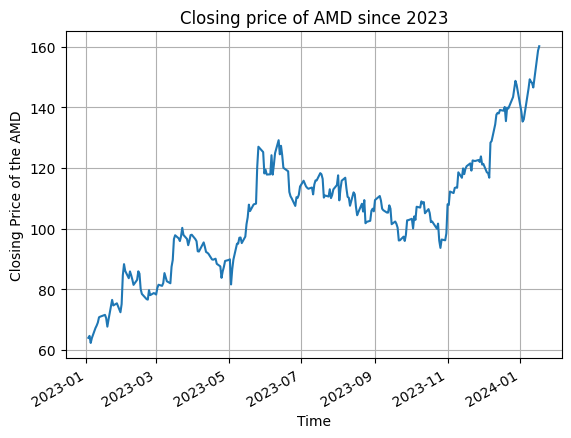

In [25]:
#Plotting the closing price of AMD stock for last one year
amd_stock['Close'].plot()
plt.ylabel('Closing Price of the AMD')
plt.xlabel('Time')
plt.title('Closing price of AMD since 2023')
plt.grid()

Text(0.5, 1.0, 'Volume of stocks that changed hand over the year')

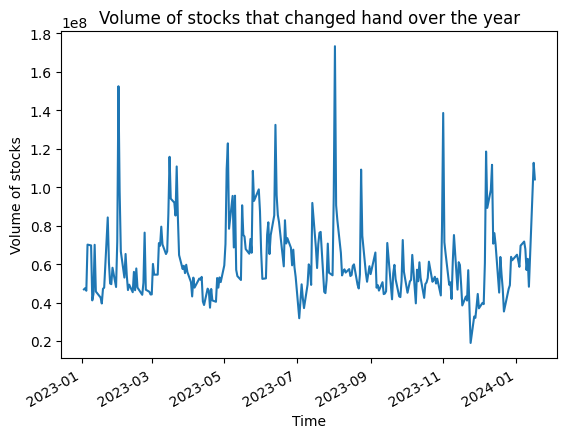

In [28]:
#Plotting the volume of stocks being traded each day for the last year
amd_stock['Volume'].plot()
plt.ylabel('Volume of stocks')
plt.xlabel('Time')
plt.title('Volume of stocks that changed hand over the year')